# Question 1

## 1.4

We want to plot $(x^*, f(x^*))$ for each of the $\tau$'s from Question 1.3.

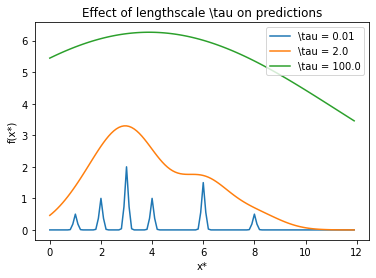

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def kernel(x, xp, tau):
    return np.exp(-(np.linalg.norm(x - xp) ** 2) / tau)

data = [(0., 0.),
        (1., 0.5),
        (2., 1.),
        (3., 2.),
        (4., 1.),
        (6., 1.5),
        (8., 0.5)]

taus = [0.01, 2., 100.]

x = np.arange(0, 12, .1)
for tau in taus:
    y = [sum([kernel(xn, xi, tau) * yn for xn, yn in data]) for xi in x]
    plt.plot(x, y, label=f'\\tau = {tau}')

plt.xlabel('x*')
plt.ylabel('f(x*)')
plt.title('Effect of lengthscale \\tau on predictions')
plt.legend(loc='upper right')
plt.show()

This is consistent with the best lengthscales that we found numerically.

For $\tau = 100.0$, our kernel returns a weight close to $1$ for each training data point. This causes our predictions to be swollen, since they are essentially a sum of all the test data points.

For $\tau = 0.01$, our kernel returns a weight close to $0$ for training data that is even slightly far away from the $x^*$ that we are predicting. This causes our kernel to perform poorly for test data points that are not very close to any training data points.

For $\tau = 2.0$ our kernel is in a goldilocks zone.

## Question 2

### 1

y is:
[0.  0.5 1.  2.  1.  1.5 0.5]


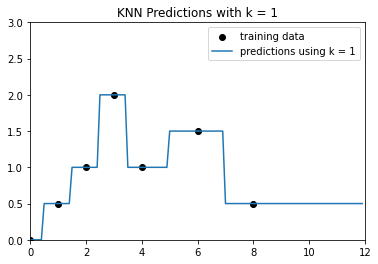

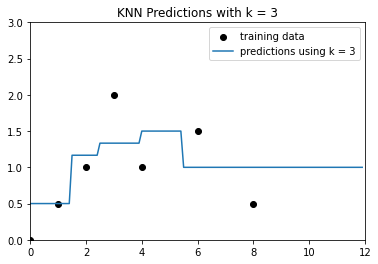

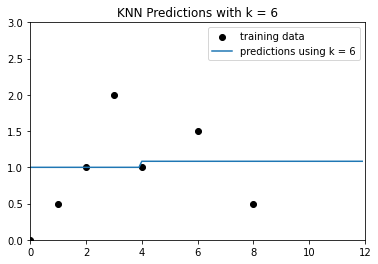

In [22]:
import math
import matplotlib.cm as cm

from math import exp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c

# set up data
data = [(0., 0.),
        (1., 0.5),
        (2., 1),
        (3., 2),
        (4., 1),
        (6., 1.5),
        (8., 0.5)]

x_train = np.array([d[0] for d in data])
y_train = np.array([d[1] for d in data])

x_test = np.arange(0, 12, .1)

print("y is:")
print(y_train)

def distance(x1, x2, tau):
    return np.exp(-(np.linalg.norm(x1 - x2) ** 2))

def predict_knn(k=1, tau=1):
    """Returns predictions for the values in x_test, using KNN predictor with the specified k."""
    y = []
    for x in x_test:
        k_closest = sorted(data, key=lambda d, x=x : (distance(x, d[0], tau), x))[len(data)-k:]
        y.append(sum(map(lambda d : d[1], k_closest)) / k)
    return y


def plot_knn_preds(k):
    plt.xlim([0, 12])
    plt.ylim([0,3])
    
    y_test = predict_knn(k=k)
    
    plt.scatter(x_train, y_train, label = "training data", color = 'black')
    plt.plot(x_test, y_test, label = "predictions using k = " + str(k))

    plt.legend()
    plt.title("KNN Predictions with k = " + str(k))
    plt.savefig('k' + str(k) + '.png')
    plt.show()

for k in (1, 3, len(data)-1):
    plot_knn_preds(k)

### 2
What I see:

Behavior of functions:

Comparison to behavior of three plots from problem 1:
- k = 2 overfits data. Similar to tau = 0.01 for kernelized regression.
- k = 6 looks like an average of all data. Similar to tau = 100 for kernelized regression.
- k = 3 looks like a good fit.

Interpolating and extrapolating similarly:

Are there values of k and t where kNN and kernel-based regressors produced the exact same classifier?


### 3

Why do we not vary tau for kNN?
- Doesn't matter if we vary tau because it will always affect distances proportionally (i.e., the set of k-closest points will always be the same for any choice of tau).

## Question 4

### 1

Plot year (x-axis) vs number of republicans in the senate (y-axis) for 4 different basis functions (a) through (d).

394.9803839890865


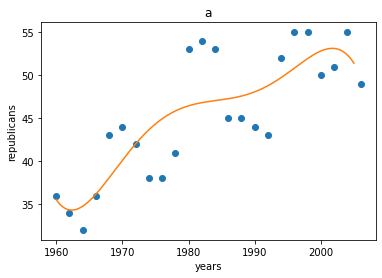

54.27309661671963


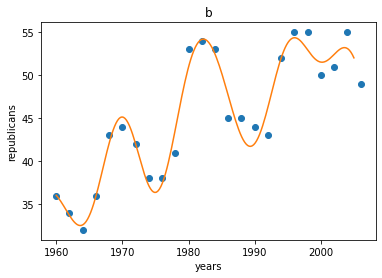

48165.91114029842


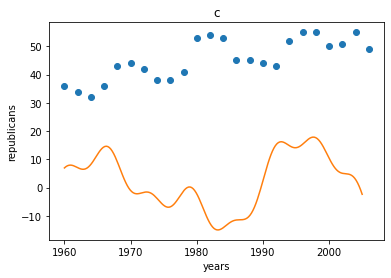

38.996582027870865


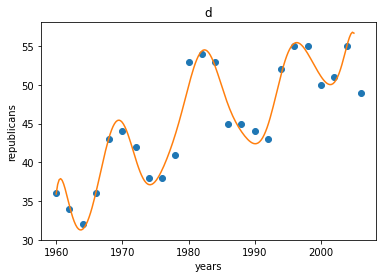

In [146]:
#####################
# CS 181, Spring 2022
# Homework 1, Problem 4
# Start Code
##################

import csv
import numpy as np
import matplotlib.pyplot as plt

csv_filename = 'data/year-sunspots-republicans.csv'
years  = []
republican_counts = []
sunspot_counts = []

with open(csv_filename, 'r') as csv_fh:

    # Parse as a CSV file.
    reader = csv.reader(csv_fh)

    # Skip the header line.
    next(reader, None)

    # Loop over the file.
    for row in reader:

        # Store the data.
        years.append(float(row[0]))
        sunspot_counts.append(float(row[1]))
        republican_counts.append(float(row[2]))

# Turn the data into numpy arrays.
years  = np.array(years)
republican_counts = np.array(republican_counts)
sunspot_counts = np.array(sunspot_counts)
last_year = 1985

# Plot the data.
# plt.figure(1)
# plt.plot(years, republican_counts, 'o')
# plt.xlabel("Year")
# plt.ylabel("Number of Republicans in Congress")
# plt.figure(2)
# plt.plot(years, sunspot_counts, 'o')
# plt.xlabel("Year")
# plt.ylabel("Number of Sunspots")
# plt.figure(3)
# plt.plot(sunspot_counts[years<last_year], republican_counts[years<last_year], 'o')
# plt.xlabel("Number of Sunspots")
# plt.ylabel("Number of Republicans in Congress")
# plt.show()

# Create the simplest basis, with just the time and an offset.
# X = np.vstack((np.ones(years.shape), years)).T

# TODO: basis functions
# Based on the letter input for part ('a','b','c','d'), output numpy arrays for the bases.
# The shape of arrays you return should be: (a) 24x6, (b) 24x12, (c) 24x6, (c) 24x26
# xx is the input of years (or any variable you want to turn into the appropriate basis).
# is_years is a Boolean variable which indicates whether or not the input variable is
# years; if so, is_years should be True, and if the input varible is sunspots, is_years
# should be false
def make_basis(xx,part='a',is_years=True):
#DO NOT CHANGE LINES 65-69
    if part == 'a' and is_years:
        xx = (xx - np.array([1960]*len(xx)))/40
        
    if part == 'a' and not is_years:
        xx = xx/20
    
    if part == 'a':
        phi_xx = np.array([[1, *[x ** j for j in range(1,6)]] for x in xx])
    
    if part == 'b':
        phi_xx = np.array([[1, *[np.exp(-((x - uj) ** 2) / 25.) for uj in range(1960, 2011, 5)]] for x in xx])
    
    if part == 'c':
        phi_xx = np.array([1, *[np.cos(x / j) for j in range(1,6)] for x in xx])
    
    if part == 'd':
        phi_xx = np.array([1, *[np.cos(x / j) for j in range(1,26)] for x in xx])

    return phi_xx

# Nothing fancy for outputs.
Y = republican_counts

# Find the regression weights using the Moore-Penrose pseudoinverse.
def find_weights(X,Y):
    w = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, Y))
    return w

def find_squared_error(X, Y, w):
    assert len(X) == len(Y), "Invalid arguments X, Y"
    return sum([(Y[i] - np.dot(X[i,:],w)) ** 2 for i in range(len(X))])

# Compute the regression line on a grid of inputs.
# DO NOT CHANGE grid_years!!!!!
grid_years = np.linspace(1960, 2005, 200)
grid_X = np.vstack((np.ones(grid_years.shape), grid_years))
# grid_Yhat  = np.dot(grid_X.T, w)

# TODO: 1 - plot and report sum of squared error for each basis
for part in ['a', 'b', 'c', 'd']:
    plt.figure(4)

    # Plot years vs. republican_counts
    plt.plot(years, Y, 'o')

    # Make basis for training data and find best weights
    phiX = make_basis(years, part)
    w = find_weights(phiX, Y)
    
    # Calculate squared error
    print(find_squared_error(phiX, Y, w))
    
    # Plot a regression of these weights
    grid_phiX = make_basis(grid_years, part)
    grid_Yhat = np.dot(w.T, grid_phiX.T)
    plt.plot(grid_years, grid_Yhat)

    plt.title(part)
    plt.xlabel("years")
    plt.ylabel("republicans")
    plt.show()



# Plot the data and the regression line.
# plt.plot(years, republican_counts, 'o', grid_years, grid_Yhat, '-')
# plt.xlabel("Year")
# plt.ylabel("Number of Republicans in Congress")
# plt.show()